change runtime to **GPU**

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fatch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:00<00:00, 583MB/s] 
100% 163M/163M [00:00<00:00, 588MB/s]


In [ ]:
# extracting the compressed file
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the datset is extracted")

the datset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
# with mask
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1783.jpg', 'with_mask_984.jpg', 'with_mask_655.jpg', 'with_mask_2549.jpg', 'with_mask_472.jpg']
['with_mask_1629.jpg', 'with_mask_3387.jpg', 'with_mask_106.jpg', 'with_mask_1383.jpg', 'with_mask_2544.jpg']


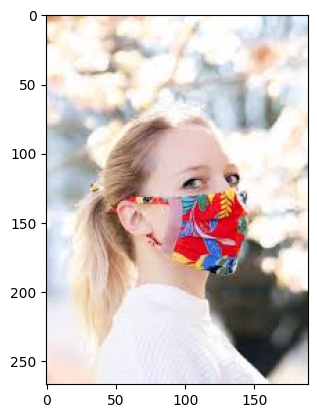

In [ ]:
# displaying hte with mask human
img = mpimg.imread('/content/data/with_mask/with_mask_2993.jpg')
img_plot =  plt.imshow(img)
plt.show()

In [ ]:
#without mask
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2528.jpg', 'without_mask_35.jpg', 'without_mask_2611.jpg', 'without_mask_3412.jpg', 'without_mask_868.jpg']
['without_mask_2412.jpg', 'without_mask_1296.jpg', 'without_mask_2247.jpg', 'without_mask_52.jpg', 'without_mask_2410.jpg']


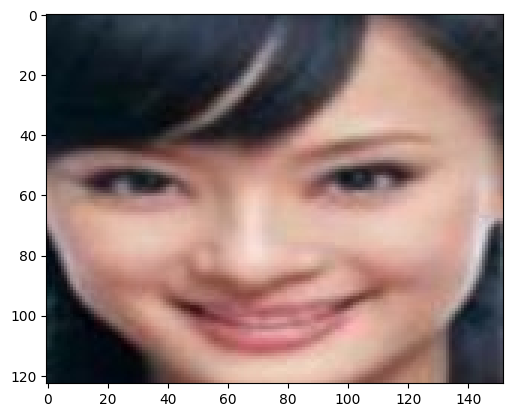

In [ ]:
# displayinh the without mask human
img = mpimg.imread('/content/data/without_mask/without_mask_541.jpg')
img_plot = plt.imshow(img)
plt.show()

In [ ]:
# size of with mask dataset
len(with_mask_files)

3725

In [ ]:
# size of without mask dataset
len(without_mask_files)

3828

**Creating labes for the two class of images**

with mask --> 1

without mask --> 0

In [ ]:
# creating lables

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [ ]:
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [ ]:
# combining the two list
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Image Processing**

1. Resize the images

2. Convert the images to umpy arrays

In [ ]:
# convert the images to numpy array

#for with mask dataset

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


# for without mask dataset
without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(data[0])

[[[195 195 197]
  [195 195 197]
  [195 195 197]
  ...
  [191 191 192]
  [192 193 195]
  [192 193 195]]

 [[195 195 197]
  [195 195 197]
  [195 195 197]
  ...
  [191 191 192]
  [191 192 194]
  [191 192 194]]

 [[194 194 196]
  [194 194 196]
  [194 194 196]
  ...
  [191 191 191]
  [190 191 193]
  [190 191 193]]

 ...

 [[233 233 233]
  [229 229 229]
  [227 227 227]
  ...
  [233 231 234]
  [235 235 237]
  [235 235 237]]

 [[227 227 227]
  [222 222 222]
  [219 219 219]
  ...
  [233 232 234]
  [228 228 230]
  [228 228 230]]

 [[230 230 230]
  [224 224 224]
  [222 222 222]
  ...
  [236 234 237]
  [232 232 234]
  [232 232 234]]]


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting the images list and labels list to numpy array
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


**Scaling of data**

In [ ]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [ ]:
print(x_train_scale[0])

[[[0.94117647 0.77254902 0.57254902]
  [0.94509804 0.77647059 0.57647059]
  [0.95686275 0.78039216 0.58823529]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.94901961 0.76470588 0.56470588]
  [0.94901961 0.76862745 0.56862745]
  [0.96078431 0.77647059 0.58039216]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.95294118 0.75686275 0.54901961]
  [0.95686275 0.76078431 0.54901961]
  [0.96470588 0.76862745 0.56862745]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.09019608 0.14509804 0.19607843]
  [0.09019608 0.14509804 0.19607843]
  [0.10196078 0.14509804 0.20784314]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.09411765 0.14901961 0.2       ]
  [0.09019608 0.14509804 0.2       ]


**Building Convolutional Neural Network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (128,128,3)),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_of_classes,activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)


In [ ]:
# training the neural network
history = model.fit(x_train_scale,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9349 - loss: 0.1441 - val_acc: 0.9174 - val_loss: 0.2232
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9563 - loss: 0.1076 - val_acc: 0.9207 - val_loss: 0.2612
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9701 - loss: 0.0843 - val_acc: 0.9140 - val_loss: 0.3172
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9667 - loss: 0.0839 - val_acc: 0.9074 - val_loss: 0.2859
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9716 - loss: 0.0767 - val_acc: 0.9058 - val_loss: 0.3022
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9689 - loss: 0.0819 - val_acc: 0.9190 - val_loss: 0.2978
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9784 - loss: 0.0588 - val_acc: 0.9174 - val_loss: 0.3372
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9782 - loss: 0.0565 - val_acc: 0.9207 - val_loss: 0.2766
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/

**Model Evaluation**

In [ ]:
loss,accuracy = model.evaluate(x_test_scale,y_test)
print("test accuracy ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9355 - loss: 0.2182
test accuracy  0.9324950575828552


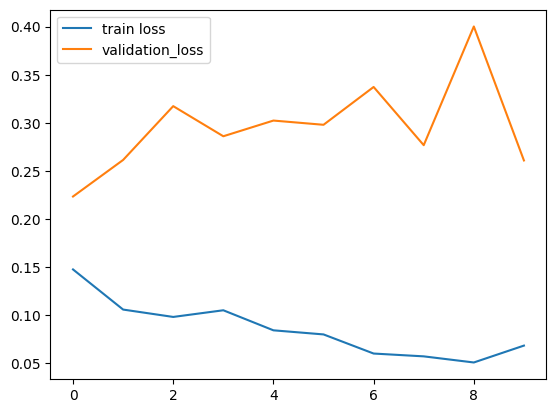

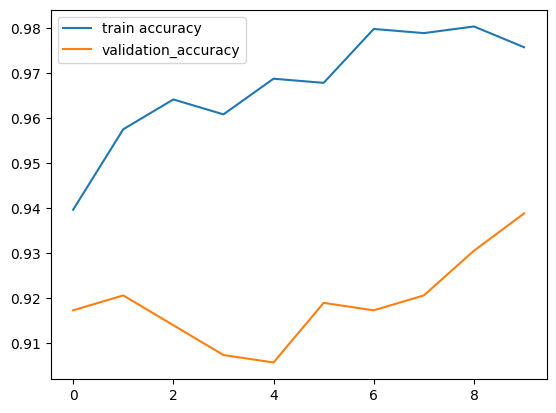

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'],label = 'train accuracy')
plt.plot(h.history['val_acc'],label = 'validation_accuracy') # Changed key from 'accuracy_loss' to 'val_acc'
plt.legend()
plt.show()


**Building Predictive System**

In [ ]:
input_img_path = input('enter the image path to be predicted')
input_image = cv2.imread(input_img_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if (input_pred_label == 1):
  print('wearing mask')

else:
  print('nor wearing mask')
